In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df=pd.read_csv("C:\\Users\\Nirmal Nathani\\Downloads\\Fraud.csv",nrows=20000)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
df.drop(['nameOrig','nameDest'],axis=1)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
19995,8,PAYMENT,17031.89,105935.0,88903.11,0.00,0.00,0,0
19996,8,CASH_IN,121530.49,10430.0,131960.49,99479.60,98055.06,0,0
19997,8,TRANSFER,780953.77,905174.0,124220.23,3145.61,1925872.77,0,0
19998,8,PAYMENT,9987.56,39734.0,29746.44,0.00,0.00,0,0


In [18]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
df.shape

(20000, 11)

# Cleaning the data including Missing Values,outliers and multi-collinearity

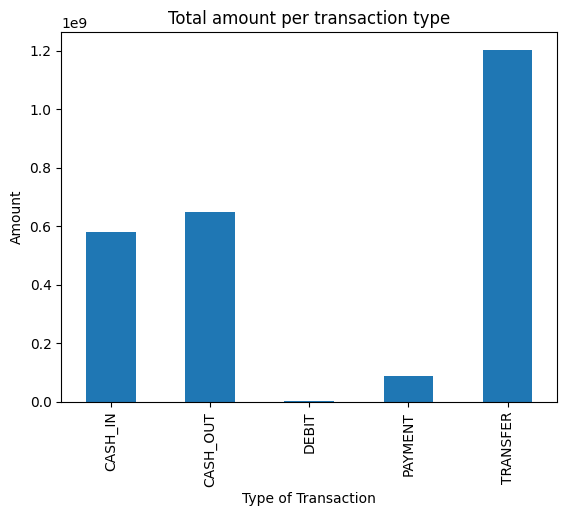

In [20]:
var=df.groupby('type').amount.sum()
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');


In [21]:
df.loc[df.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

<Axes: >

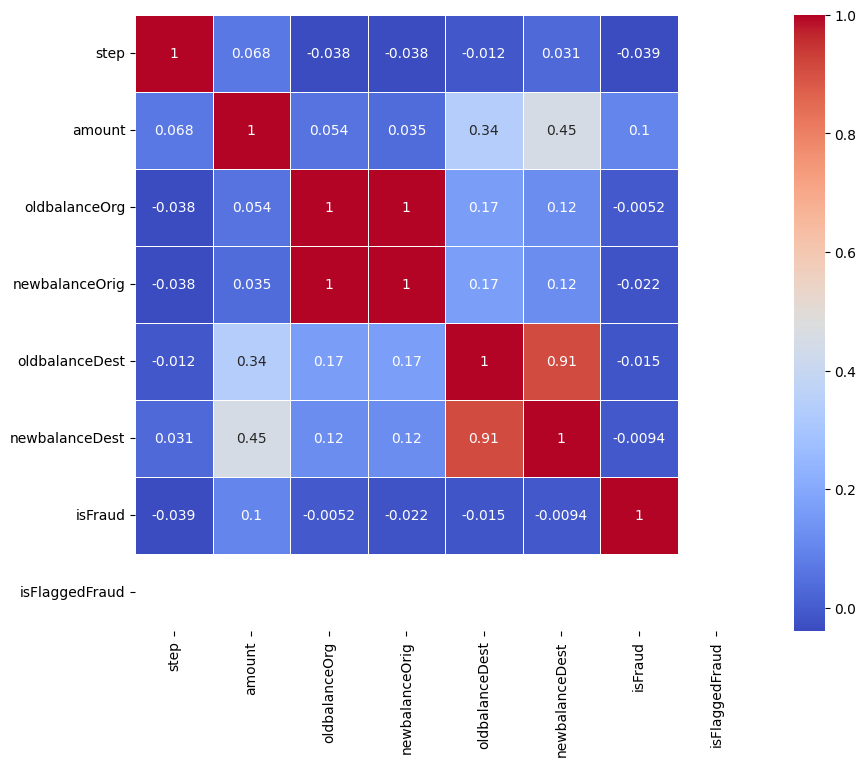

In [22]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


In [23]:
fraud = df.loc[df.isFraud == 1]
fraud1= df.loc[df.isFraud == 1].select_dtypes(include=['number'])
nonfraud = df.loc[df.isFraud == 0]

<Axes: >

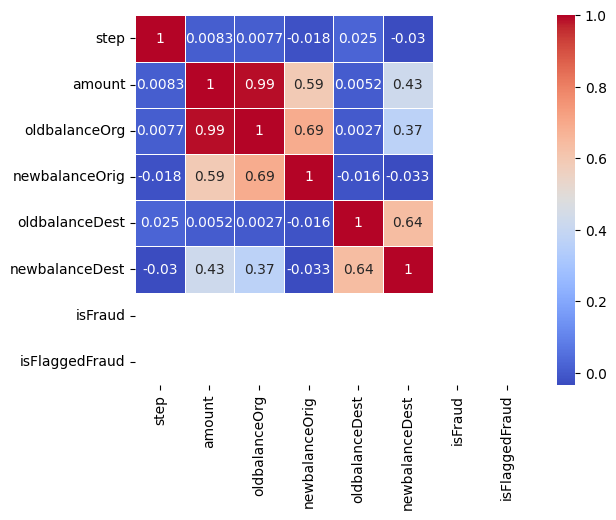

In [24]:
fraudcount = fraud1.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()
sns.heatmap(fraud1.corr(),annot=True,cmap='coolwarm', linewidths=0.5)

In [25]:
print('The total number of fraud transaction is {}.'.format(df.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(df.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 81.
The total number of fraud transaction which is marked as fraud 0.
Ratio of fraud transaction vs non-fraud transaction is 1:245.


In [26]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $48347524.


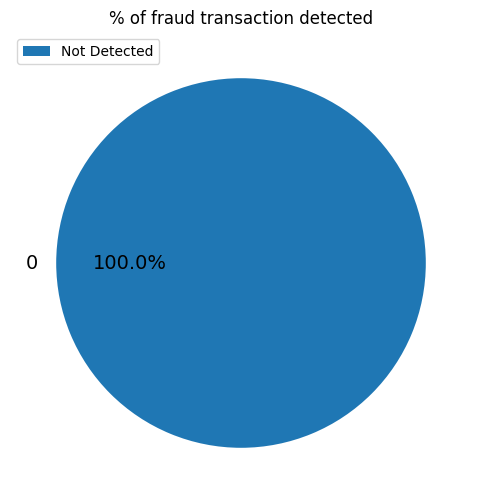

In [27]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%')
axes.set_ylabel('')
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

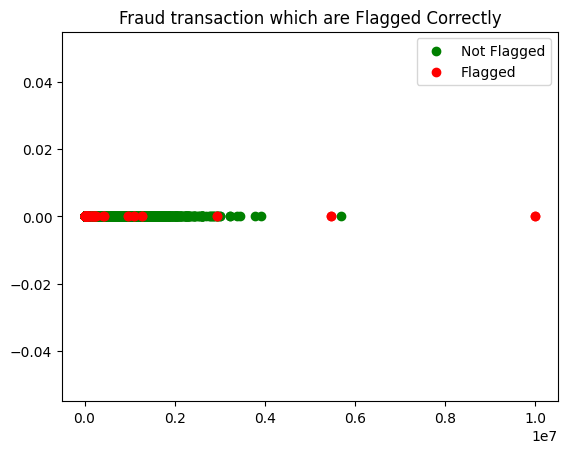

In [28]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

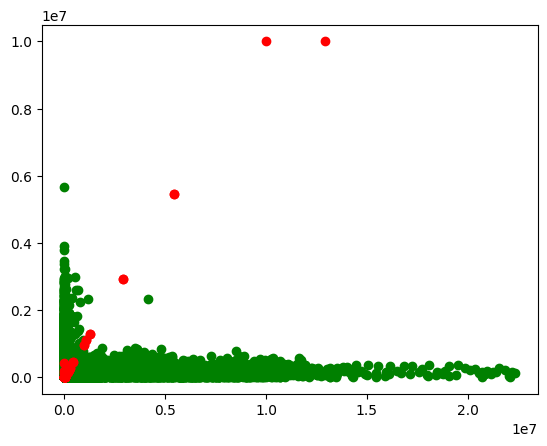

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

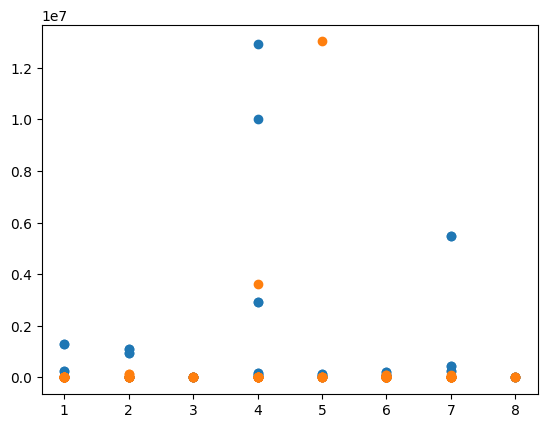

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

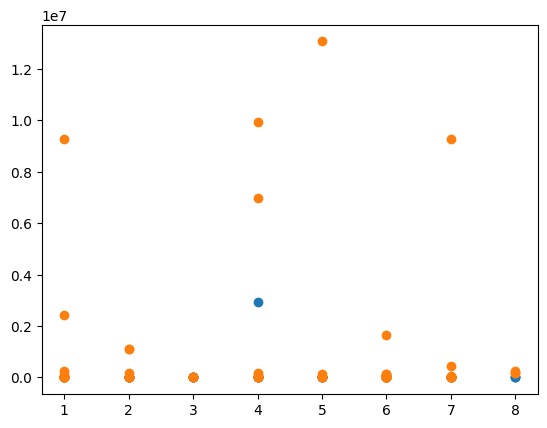

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrig'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

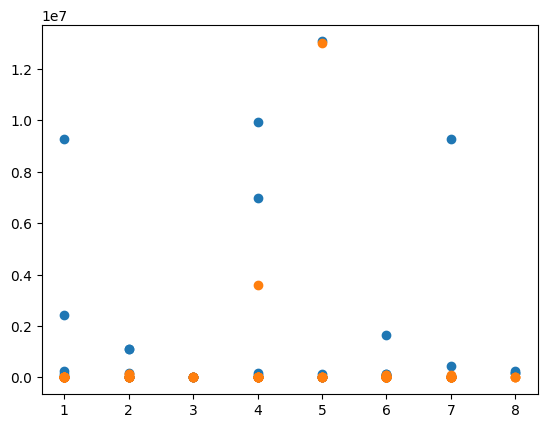

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

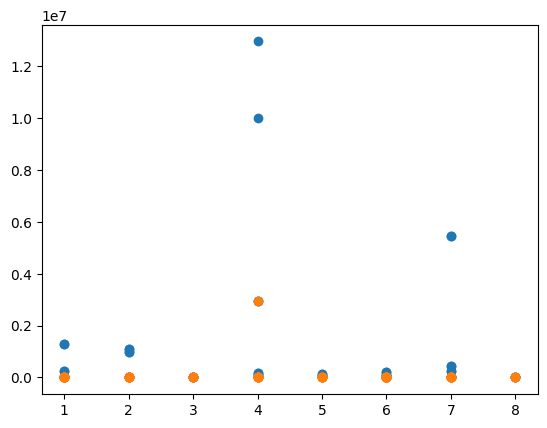

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrig'])
plt.show()

# Model Building 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("C:\\Users\\Nirmal Nathani\\Downloads\\Fraud.csv",nrows=20000)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data = data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [7]:
data=data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)


In [ ]:
new_data=data.copy()
X = new_data.drop('isFraud',axis=1,inplace=True)
y = data[['isFraud']]

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [ ]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [ ]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))